In [2]:
import pandas as pd

blue_heg_readings = pd.read_csv("HEG_readings_blue.csv")
green_heg_readings = pd.read_csv("HEG_readings_green.csv")
red_heg_readings = pd.read_csv("HEG_readings_red.csv")

blue_heg_readings.drop(columns=["timestamp"], inplace=True)
green_heg_readings.drop(columns=["timestamp"], inplace=True)
red_heg_readings.drop(columns=["timestamp"], inplace=True)



,reading
0,157.550
1,155.676
2,157.373
3,158.636
4,160.114


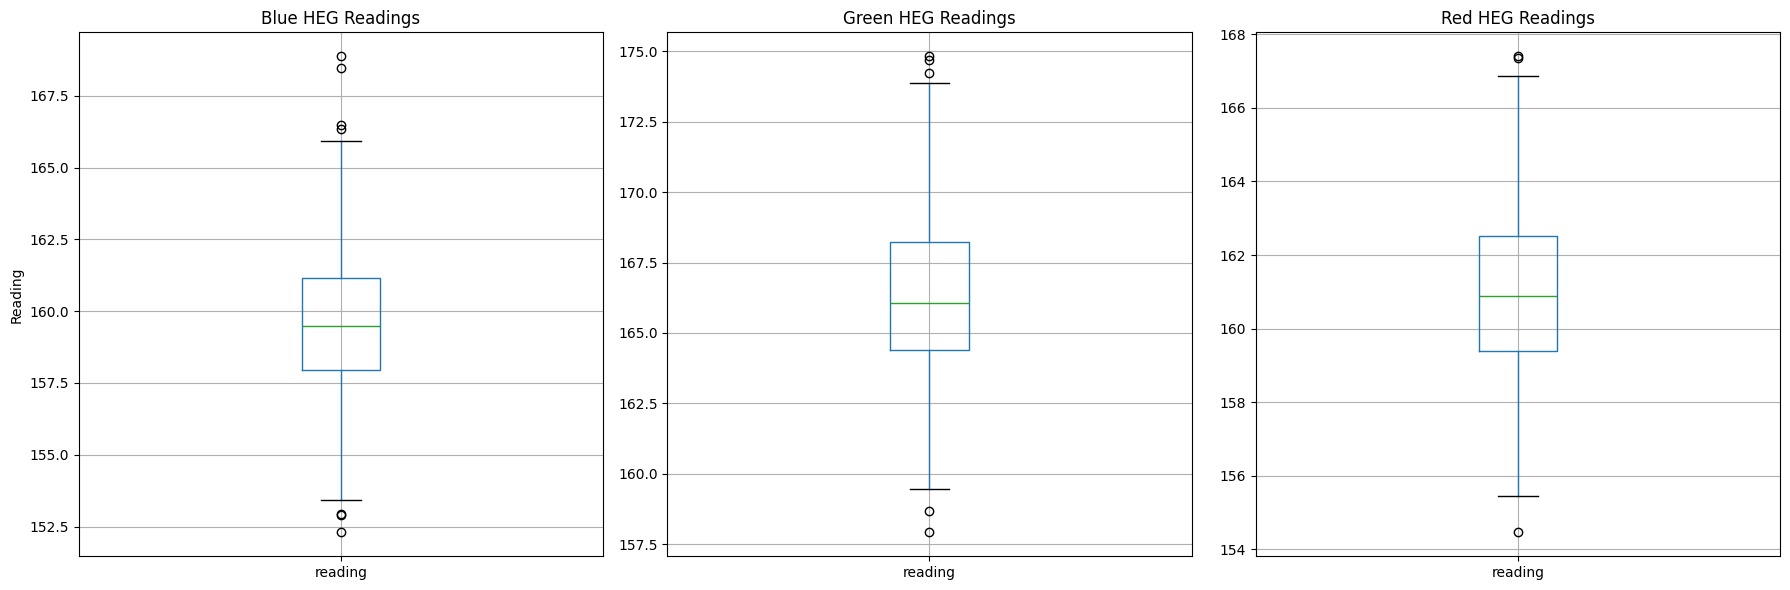

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

blue_heg_readings.boxplot(ax=axes[0])
axes[0].set_title('Blue HEG Readings')
axes[0].set_ylabel('Reading')

green_heg_readings.boxplot(ax=axes[1])
axes[1].set_title('Green HEG Readings')

red_heg_readings.boxplot(ax=axes[2])
axes[2].set_title('Red HEG Readings')

plt.tight_layout()
plt.show()


In [4]:
# add labels
blue_heg_readings["label"] = "blue"
green_heg_readings["label"] = "green"
red_heg_readings["label"] = "red"

# combine the dataframes
df = pd.concat([blue_heg_readings, green_heg_readings, red_heg_readings])

   reading label
0  157.550  blue
1  155.676  blue
2  157.373  blue
3  158.636  blue
4  160.114  blue      reading label
591  162.445   red
592  158.588   red
593  158.569   red
594  159.979   red
595  159.259   red


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
x = df[["reading"]]
y = df["label"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(x_train, y_train)

In [ ]:
predictions = model.predict(x_test)

print(classification_report(y_test, predictions))
